# Optimisation

So far we have trained our model by updating its parameters using gradient descent. In this notebook we will study some more advanced optimisation strategies that can lead to better performance and faster training. The objective of an optimiser is to minimise the value of a loss function using an iterative algorithm. Optimising loss function with respect to the model parameters is rarely convex problem and reaching a good local minimum can be challenging.

**Instructions:** ensure your Python environment is setup with the following additional packages: 

- `t6utils.py` contains unit tests to check your code, implementation for a simple deep feedforward neural network and some helper functions 

In [3]:
# Package imports
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import t6utils as t6

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

%load_ext autoreload
%autoreload 2

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## A. Mini-Batch (Stochastic) Gradient Descent Optimiser ##

Gradient descent is a simple optimisation algorithm where a gradient step is taken with respect to all sample of the training set. It is sometimes referred to as **Batch Gradient Descent** (BGD or simply GD). This is the method weve been using until now.

<font color='darkred'>**Exercise:**</font> Complete the batch gradient descent upadte in the following function. Given a learning rate $\lambda$, the update rule for the parameters of the $k$-th layer is given by:

$$ W^{[k]} = W^{[k]} - \lambda \text{ } \frac{\partial \mathcal{L}}{\partial W^{[k]}} = W^{[k]} - \lambda \text{ } dW^{[k]} \tag{1}$$
$$ b^{[k]} = b^{[k]} - \lambda \text{ } \frac{\partial \mathcal{L}}{\partial b^{[k]}} = b^{[k]} - \lambda \text{ } db^{[k]}\tag{2}$$


In [23]:
# Update model parameters
def gd_update_params(params, grads, learning_rate=0.8):
    """
    Updates parameters using gradient descent
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h1)
        b1 -- initialised weight matrix of shape (1, n_h1)
        ...
        WK -- initialised weight matrix of shape (n_hK-1, n_y)
        bK -- initialised weight matrix of shape (1, n_y)
    grads -- dictionary containing gradients
        dW1 -- weight gradient matrix of shape (n_x, n_h1)
        db1 -- bias gradient vector of shape (1, n_h1)
        ...
        dWK -- weight gradient matrix of shape (n_hK-1, n_y)
        dbK -- bias gradient vector of shape (1, n_y)
    learning_rate -- learning rate of the gradient descent (hyperparameter)

    Returns:
    params -- dictionary containing updated parameters
    """

    K = len(params) >> 1
    for k in range(1, K + 1):
        ### INPUT YOUR CODE HERE ### (2 lines)
        params['W{}'.format(k)]-=learning_rate*grads['dW{}'.format(k)] 
        params['b{}'.format(k)]-=learning_rate*grads['db{}'.format(k)] 
        ### END OF YOUR CODE SEGMENT ### 
    
    return params

In [24]:
# testing
params, grads = t6.update_params_test()
params = gd_update_params(params, grads, 0.1)
print("W1.T = {}".format(params['W1'].T))
print("b1 = {}".format(params['b1']))
print("W2.T = {}".format(params['W2'].T))
print("b2 = {}".format(params['b2']))

W1.T = [[-0.397  1.518  0.582  1.001]
 [ 0.778 -0.334  0.35  -1.558]
 [ 1.472  0.721 -0.231 -0.433]]
b1 = [[-0.071 -0.686  0.24 ]]
W2.T = [[-0.149  2.727  0.619]]
b2 = [[0.748]]


***Expected Output:***<br>
`W1.T = [[-0.397  1.518  0.582  1.001]
 [ 0.778 -0.334  0.35  -1.558]
 [ 1.472  0.721 -0.231 -0.433]]
b1 = [[-0.071 -0.686  0.24 ]]
W2.T = [[-0.149  2.727  0.619]]
b2 = [[0.748]]`

Applying gradient update for each sample in the training set defines a variant of the batch gradient descent called **Stochastic Gradient Descent** (SGD). This is equivalent to a mini-batch gradient descent where each mini-batch contains a single example. The update rule is the same for both SGD and BGD. 

<table><tr>
<td> <img src="figs/bgd_optimisers.png" style="width: 350px;"/> </td>
<td width="20px;"></td>
<td> <img src="figs/sgd_optimisers.png" style="width: 350px;"/> </td>
</tr></table>
<caption><center>**Figure 1:** Stochastic gradient descent (right) converges faster than batch gradient descent (left) but leads to many oscillations as it uses only one training example for every parameters update. </center></caption>


***

*** Mini-Batch Gradient Descent Optimiser ***

In practice, we use a trade-off method called mini-batch gradient descent where parameters are updated from the gradients computed on a mini-batch of training examples e.g. 64.  

For each epoch (full batch of examples), mini-batches are contructed by partitioning the shuffled training set. 


``` python
# BGD optimisation
for i in range(epochs):
   A, loss, caches = forward_prop(params, X[j,:], Y[j,:])
   grads = back_prop(A, Y[j,:], caches)
   params = gd_update_params(params, grads, learning_rate)        

# SGD optimisation    
for i in range(epochs):
    for j in range(X.shape[0]):
        A, loss, caches = forward_prop(params, X[j,:], Y[j,:])
        grads = back_prop(A, Y[j,:], caches)
        params = gd_update_params(params, grads, learning_rate)        

# Mini-batch GD optimisation    
for i in range(epochs):
    mini_bathes = stochastic_mini_batches(X, Y, mini_batch_sz, seed)
    for j in range(len(mini_batches)):
        (X_mini_bath, Y_mini_bath) = mini_batches[j]
        A, loss, caches = forward_prop(params, X_mini_bath, Y_mini_bath)
        grads = back_prop(A, Y_mini_bath, caches)
        params = gd_update_params(params, grads, learning_rate)        
```
<listing><center>**Listing 1:** python code for various gradient optimisers</center></listing>

<table><tr>
<td> <img src="figs/sgd_optimisers.png" style="width: 350px;"/> </td>
<td width="20px;"></td>
<td> <img src="figs/mbgd_optimisers.png" style="width: 350px;"/> </td>
</tr></table>
<caption><center>**Figure 2:** Mini-batch gradient descent (right) is good compromise over stochastic gradient descent (left) with reduced oscillations and faster convergence.</center></caption>

<font color='darkred'>**Exercise:**</font> Implement the  function `stochastic_mini_batches` to prepare mini-batches for the mini-batch optimiser by shuffling and partitioning the traning set. Note that the last mini-batch may be smaller than the mini-batch size, $size_{mini-batch}$ if the total number of examples is not a multiple of $size_{mini-batch}$. In that case. the final mini-batch size will be $n-size_{mini-batch} \times\left\lfloor \frac{n}{size_{mini-batch}}\right\rfloor$ where $n$ is the total number of training examples (batch). 

Note that we often choose powers of two for the mini-batch size (e.g. 64, 128, 256).


In [29]:
# Shuffle and partition a training set into mini-batches
def stochastic_mini_batches(X, Y, mini_batch_sz=128, seed=2019):
    """
    Creates a list of random mini-batches
    
    Arguments:
    X -- training set a numpy array of shape (n, n_x)
    Y -- training groud truth vector of size (n, n_y)
    mini_batch_sz -- size of the mini-batches, integer
    seed -- random seed for reproducibility
    
    Returns:
    mini_batches -- list of mini-batches [(X_mini_batch, Y_mini_batch), ..., (X_mini_batch, Y_mini_batch)]
    """
    
    np.random.seed(seed)            
    n = X.shape[0]
    mini_batches = []
        
    # Step 1: random permutation of (X, Y)
    permutation = list(np.random.permutation(n))
    ### INPUT YOUR CODE HERE ### (2 lines)
    X_perm = X[permutation]
    Y_perm = Y[permutation]
    ### END OF YOUR CODE SEGMENT ### 


    # Step 2: Partition
    count = int(math.floor(n / mini_batch_sz))
    for i in range(count):
        ### INPUT YOUR CODE HERE ### (4 lines)
        X_mini_batch = X_perm[i*mini_batch_sz:(i+1)*mini_batch_sz]
        Y_mini_batch = Y_perm[i*mini_batch_sz:(i+1)*mini_batch_sz]
        mini_batch = (X_mini_batch, Y_mini_batch)
        mini_batches.append(mini_batch)
        ### END OF YOUR CODE SEGMENT ### 
    
    if n % mini_batch_sz != 0:
        ### INPUT YOUR CODE HERE ### (4 lines)
        X_mini_batch = X_perm[count*mini_batch_sz:]
        Y_mini_batch = Y_perm[count*mini_batch_sz:]
        mini_batch = (X_mini_batch,Y_mini_batch)
        mini_batches.append(mini_batch)
        ### END OF YOUR CODE SEGMENT ### 

    return mini_batches

In [30]:
# testing
X, Y, mini_batch_sz = t6.stochastic_mini_batch_test()
mini_batches = stochastic_mini_batches(X, Y, mini_batch_sz)

print("training set size = {}".format(X.shape[0]))
print("mini-batch size = {}".format(mini_batch_sz))
print("number of mini-batches = {}".format(len(mini_batches)))

import functools
print("number of examples in all mini-batches = {}".format(functools.reduce(lambda x, y : y[0].shape[0] + x , mini_batches, 0)))
print("number of examples in last mini-batch = {}".format(mini_batches[-1][0].shape[0]))

training set size = 132
mini-batch size = 64
number of mini-batches = 3
number of examples in all mini-batches = 132
number of examples in last mini-batch = 4


***Expected Output:***<br>
`training set size = 132
mini-batch size = 64
number of mini-batches = 3
number of examples in all mini-batches = 132
number of examples in last mini-batch = 4`

## B. Gradient Descent Optimiser with Momentum ##

Mini-batch gradient descent yields model parameter updates after seeing each set of mini-batch examples. As a result, the gradient direction has some relatively high variance, resulting in convergence oscillations. These can be reduced using momentum, taking into account past gradients to smooth out the update. 

As a result, a cache is required to hold the direction of previous gradients refered to with variable $v$. You can also think of $v$ as the velocity of a parameter ball rolling downhill and building up momentum (speed) in  the direction of the slope of the hill. A common strategy is to apply an exponentially decay on the past gradient average.  


<font color='darkred'>**Exercise:**</font> Initialise the velocity as a python dictionary of arrays with zeros (same keys and shape as arrays in the `grads` dictionary).

In [33]:
# Initialise momentum parameters
def initialise_velocity(params):
    """
    Initialises the optimiser velocity
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h1)
        b1 -- initialised weight matrix of shape (1, n_h1)
        ...
        WK -- initialised weight matrix of shape (n_hK-1, n_y)
        bK -- initialised weight matrix of shape (1, n_y)
    
    Returns:
    v -- dictionary containing current velocity
        dW1 -- zero matrix of shape W1
        db1 -- zero matrix of shape b1
        ...
        dWK -- zero matrix of shape WK
        dbK -- zero matrix of shape WK
    """
    
    K = len(params) >> 1
    v = {}
    
    # Initialize velocity
    for k in range(1, K + 1):
        ### INPUT YOUR CODE HERE ### (2 lines)
        v['dW{}'.format(k)] = np.zeros(list(params['W{}'.format(k)].shape))
        v['db{}'.format(k)] = np.zeros(list(params['b{}'.format(k)].shape))
        ### END OF YOUR CODE SEGMENT ###         
        
    return v

In [34]:
# testing
params = t6.initialise_velocity_test()
v = initialise_velocity(params)
print("v[\'dW1\'] = {}".format(v['dW1']))
print("v[\'db1\'] = {}".format(v['db1']))
print("v[\'dW2\'].T = {}".format(v['dW2'].T))
print("v[\'db2\'] = {}".format(v['db2']))

v['dW1'] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v['db1'] = [[0. 0. 0.]]
v['dW2'].T = [[0. 0. 0.]]
v['db2'] = [[0.]]


***Expected Output:***<br>
`v['dW1'] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v['db1'] = [[0. 0. 0.]]
v['dW2'].T = [[0. 0. 0.]]
v['db2'] = [[0.]]`

<font color='darkred'>**Exercise:**</font>  Implement the parameters update with momentum using the following rules:

$$ \begin{cases}
v_{dW^{[k]}} = \beta v_{dW^{[k]}} + (1 - \beta) dW^{[k]} \\
v_{db^{[k]}} = \beta v_{db^{[k]}} + (1 - \beta) db^{[k]}\\
W^{[k]} = W^{[k]} - \lambda v_{dW^{[k]}}\\
b^{[k]} = b^{[k]} - \lambda v_{db^{[k]}} 
\end{cases}\notag$$

where $k\in 1\ldots K$ refers to the $k$-th layer, $\lambda$ is the learning rate and $\beta$ is the momentum. All parameters are to be stored in the `params` dictionary. 

- Velocities are initialised to zeros and it will take a few iteration before the algorithm builds up some velocity momentum and take bigger steps in the gradient descent. When $\beta = 0$, momentum gradient descent reduces to standard gradient descent. 

- The larger the momentum $\beta$, the smoother the update. However if $\beta$ is too big, it may smooth out the updates too much. Common values for $\beta$ range from 0.8 to 0.999. A reasonable default value is $\beta = 0.9$. Tuning for the optimal $\beta$ for your model requires that you test several values to determine what works best. 



In [35]:
# Update model parameters using momentum
def momentum_update_params(params, grads, v, beta=0.9, learning_rate=0.8):
    """
    Updates parameters using gradient descent with momentum
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h1)
        b1 -- initialised weight matrix of shape (1, n_h1)
        ...
        WK -- initialised weight matrix of shape (n_hK-1, n_y)
        bK -- initialised weight matrix of shape (1, n_y)
    grads -- dictionary containing gradients
        dW1 -- weight gradient matrix of shape (n_x, n_h1)
        db1 -- bias gradient vector of shape (1, n_h1)
        ...
        dWK -- weight gradient matrix of shape (n_hK-1, n_y)
        dbK -- bias gradient vector of shape (1, n_y)
    v -- dictionary containing current velocity
        dW1 -- momentum matrix of shape (n_x, n_h1)
        db1 -- momentum vector of shape (1, n_h1)
        ...
        dWK -- momentum matrix of shape (n_hK-1, n_y)
        dbK -- momentum vector of shape (1, n_y)
    beta -- momentum scalar (hyperparameter)
    learning_rate -- learning rate of the gradient descent (hyperparameter)

    Returns:
    params -- dictionary containing updated parameters
    v -- dictionary containing updated velocities
    """

    K = len(params) >> 1
    
    for k in range(1, K + 1):
        ### INPUT YOUR CODE HERE ### (4 lines)
        v['dW{}'.format(k)] = beta*v['dW{}'.format(k)] + (1-beta)*grads['dW{}'.format(k)]
        v['db{}'.format(k)] = beta*v['db{}'.format(k)] + (1-beta)*grads['db{}'.format(k)]
        params['W{}'.format(k)] = params['W{}'.format(k)] - learning_rate*v['dW{}'.format(k)]
        params['b{}'.format(k)] = params['b{}'.format(k)] - learning_rate*v['db{}'.format(k)]
        ### END OF YOUR CODE SEGMENT ###         
    
    return params, v

In [36]:
params, grads, v = t6.momentum_update_params_test()
params, v = momentum_update_params(params, grads, v, beta=0.9, learning_rate=0.01)
print("W1 = {}".format(params['W1']))
print("b1 = {}".format(params['b1']))
print("W2.T = {}".format(params['W2'].T))
print("b2 = {}".format(params['b2']))
print("v[\'dW1\'] = {}".format(v['dW1']))
print("v[\'db1\'] = {}".format(v['db1']))
print("v[\'dW2\'].T = {}".format(v['dW2'].T))
print("v[\'db2\'] = {}".format(v['db2']))

W1 = [[-0.219  0.821  1.481]
 [ 1.334 -0.362  0.686]
 [ 0.574  0.288 -0.236]
 [ 0.954 -1.688 -0.346]]
b1 = [[ 0.016 -0.517  0.244]]
W2.T = [[-0.189  2.673  0.466]]
b2 = [[0.845]]
v['dW1'] = [[ 0.179  0.044  0.01 ]
 [-0.186 -0.028 -0.035]
 [-0.008 -0.063 -0.004]
 [-0.048 -0.131  0.088]]
v['db1'] = [[0.088 0.171 0.005]]
v['dW2'].T = [[-0.04  -0.055 -0.155]]
v['db2'] = [[0.098]]


***Expected Output:***<br>
`W1 = [[-0.219  0.821  1.481]
 [ 1.334 -0.362  0.686]
 [ 0.574  0.288 -0.236]
 [ 0.954 -1.688 -0.346]]
b1 = [[ 0.016 -0.517  0.244]]
W2.T = [[-0.189  2.673  0.466]]
b2 = [[0.845]]
v['dW1'] = [[ 0.179  0.044  0.01 ]
 [-0.186 -0.028 -0.035]
 [-0.008 -0.063 -0.004]
 [-0.048 -0.131  0.088]]
v['db1'] = [[0.088 0.171 0.005]]
v['dW2'].T = [[-0.04  -0.055 -0.155]]
v['db2'] = [[0.098]]`

## C. ADAM Optimiser ##

Adam is one of the most popular optimiser used for training neural networks, combining ideas from RMSProp and momentum. It yields effective training, evaluating the following quantities to perform the parameters updates:

- exponentially weighted average of past gradients stored in $v$ and $\bar{v}$ (with bias correction) 
- exponentially weighted average of the squares of the past gradients stored $s$ and $\bar{s}$ (with bias correction)

<font color='darkred'>**Exercise:**</font> Initialize the ADAM variables $v, s$ as a python dictionary of arrays with zeros (same keys and shape as arrays in the `grads` dictionary).

In [37]:
# Initialise adam parameters
def initialise_moments(params):
    """
    Initialises the optimiser 1st and 2nd moments
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h1)
        b1 -- initialised weight matrix of shape (1, n_h1)
        ...
        WK -- initialised weight matrix of shape (n_hK-1, n_y)
        bK -- initialised weight matrix of shape (1, n_y)
    
    Returns:
    v -- dictionary containing current 1st moment estimates
        dW1 -- zero matrix of shape W1
        db1 -- zero matrix of shape b1
        ...
        dWK -- zero matrix of shape WK
        dbK -- zero matrix of shape WK
    s -- dictionary containing current 2nd moment estimates
        dW1 -- zero matrix of shape W1
        db1 -- zero matrix of shape b1
        ...
        dWK -- zero matrix of shape WK
        dbK -- zero matrix of shape WK
    """
    
    K = len(params) >> 1
    v = {}
    s = {}
    
    # Initialize velocities
    for k in range(1, K + 1):
        ### INPUT YOUR CODE HERE ### (4 lines)
        v['dW{}'.format(k)] = np.zeros(list(params['W{}'.format(k)].shape))
        v['db{}'.format(k)] = np.zeros(list(params['b{}'.format(k)].shape))
        s['dW{}'.format(k)] = np.zeros(list(params['W{}'.format(k)].shape))
        s['db{}'.format(k)] = np.zeros(list(params['b{}'.format(k)].shape))
        ### END OF YOUR CODE SEGMENT ###         
        
    return v, s

In [38]:
# testing
params = t6.initialise_velocity_test()
v, s = initialise_moments(params)
print("v[\'dW1\'] = {}".format(v['dW1']))
print("v[\'db1\'] = {}".format(v['db1']))
print("v[\'dW2\'].T = {}".format(v['dW2'].T))
print("v[\'db2\'] = {}".format(v['db2']))
print("s[\'dW1\'] = {}".format(s['dW1']))
print("s[\'db1\'] = {}".format(s['db1']))
print("s[\'dW2\'].T = {}".format(s['dW2'].T))
print("s[\'db2\'] = {}".format(s['db2']))

v['dW1'] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v['db1'] = [[0. 0. 0.]]
v['dW2'].T = [[0. 0. 0.]]
v['db2'] = [[0.]]
s['dW1'] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s['db1'] = [[0. 0. 0.]]
s['dW2'].T = [[0. 0. 0.]]
s['db2'] = [[0.]]


***Expected Output:***<br>
`v['dW1'] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v['db1'] = [[0. 0. 0.]]
v['dW2'].T = [[0. 0. 0.]]
v['db2'] = [[0.]]
s['dW1'] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s['db1'] = [[0. 0. 0.]]
s['dW2'].T = [[0. 0. 0.]]
s['db2'] = [[0.]]`

<font color='darkred'>**Exercise:**</font>  Implement the parameters update with adam using the following rules:

$$\begin{cases}
v_{dW^{[k]}} = \beta_1 v_{dW^{[k]}} + (1 - \beta_1) dW^{[k]}\\%\frac{\partial \mathcal{L} }{ \partial W^{[k]} } \\
\bar{v}_{dW^{[k]}} = \frac{v_{dW^{[k]}}}{1 - \beta_1^t} \\
s_{dW^{[k]}} = \beta_2 s_{dW^{[k]}} + (1 - \beta_2) (dW^{[k]})^2\\%\left(\frac{\partial \mathcal{L} }{\partial W^{[k]} }\right)^2 \\
\bar{s}_{dW^{[k]}} = \frac{s_{dW^{[k]}}}{1 - \beta_2^t} \\
W^{[k]} = W^{[k]} - \lambda \frac{\bar{v}_{dW^{[k]}}}{\sqrt{\bar{s}_{dW^{[k]}}} + \varepsilon}
\end{cases}$$

$$\begin{cases}
v_{db^{[k]}} = \beta_1 v_{db^{[k]}} + (1 - \beta_1) db^{[k]}\\
\bar{v}_{db^{[k]}} = \frac{v_{db^{[k]}}}{1 - \beta_1^t} \\
s_{db^{[k]}} = \beta_2 s_{db^{[k]}} + (1 - \beta_2) (db^{[k]})^2\\
\bar{s}_{db^{[k]}} = \frac{s_{db^{[k]}}}{1 - \beta_2^t} \\
b^{[k]} = b^{[k]} - \lambda \frac{\bar{v}_{db^{[k]}}}{\sqrt{\bar{s}_{db^{[k]}}} + \varepsilon}
\end{cases}$$

where $k\in 1\ldots K$ refers to the $k$-th layer, $t$ is the number of update steps considered in the ADAM algorithm, $\beta_1$ and $\beta_2$ are the two hyperparameters controlling the exponential decays, $\lambda$ is the learning rate and $\varepsilon$ is a small scalar to prevent numerical errors.

In [56]:
# Update model parameters using ADAM
def adam_update_params(params, grads, v, s, t, beta1=0.9, beta2=0.999, epsilon=1e-8, learning_rate=0.8):
    """
    Updates parameters using Adam
    
    Arguments:
    params -- dictionary containing model parameters
        W1 -- initialised weight matrix of shape (n_x, n_h1)
        b1 -- initialised weight matrix of shape (1, n_h1)
        ...
        WK -- initialised weight matrix of shape (n_hK-1, n_y)
        bK -- initialised weight matrix of shape (1, n_y)
    grads -- dictionary containing gradients
        dW1 -- weight gradient matrix of shape (n_x, n_h1)
        db1 -- bias gradient vector of shape (1, n_h1)
        ...
        dWK -- weight gradient matrix of shape (n_hK-1, n_y)
        dbK -- bias gradient vector of shape (1, n_y)
    v -- dictionary containing current 1st moment estimates
        same keys as grads
    s -- dictionary containing current 2nd moment estimates
        same keys as grads
    t -- parameter update counter (integer)
    beta1 -- 1st moment estimate scalar (hyperparameter)
    beta2 -- 2nd moment estimate scalar (hyperparameter)
    epsilon -- small scalar for numerical stability (hyperparameter)
    learning_rate -- learning rate of the gradient descent (hyperparameter)

    Returns:
    params -- dictionary containing updated parameters
    v -- dictionary containing updated 1st moment estimates
    s -- dictionary containing updated 2nd moment estimates
    """

    K = len(params) >> 1
    v_bar = {}
    s_bar = {}
    
    for k in range(1, K + 1):
        ### INPUT YOUR CODE HERE ### (10 lines)
        v['dW{}'.format(k)] = beta1*v['dW{}'.format(k)] + (1-beta1)*grads['dW{}'.format(k)]
        v['db{}'.format(k)] = beta1*v['db{}'.format(k)] + (1-beta1)*grads['db{}'.format(k)]
        
        s['dW{}'.format(k)] = beta2*s['dW{}'.format(k)] + (1-beta2)*np.square(grads['dW{}'.format(k)])
        s['db{}'.format(k)] = beta2*s['dW{}'.format(k)] + (1-beta2)*np.square(grads['dW{}'.format(k)])

        v_bar['dW{}'.format(k)] = v['dW{}'.format(k)]/(1-np.power(beta1,t))
        v_bar['db{}'.format(k)] = v['db{}'.format(k)]/(1-np.power(beta1,t))

        s_bar['dW{}'.format(k)] = s['dW{}'.format(k)]/(1-np.power(beta2,t))
        s_bar['db{}'.format(k)] = s['db{}'.format(k)]/(1-np.power(beta2,t))
        
        params['W{}'.format(k)] = params['W{}'.format(k)] - (learning_rate*v_bar['dW{}'.format(k)]/(np.sqrt(s_bar['dW{}'.format(k)])+epsilon))
        params['b{}'.format(k)] = params['b{}'.format(k)] - (learning_rate*v_bar['db{}'.format(k)]/(np.sqrt(s_bar['db{}'.format(k)])+epsilon))
        ### END OF YOUR CODE SEGMENT ###         
    
    return params, v, s

In [57]:
# testing
params, grads, v, s = t6.adam_update_params_test()
params, v, s = adam_update_params(params, grads, v, s, t=3, beta1=0.9, beta2=0.999, epsilon=1e-8, learning_rate=0.01)
print("W1 = {}".format(params['W1']))
print("b1 = {}".format(params['b1']))
print("W2.T = {}".format(params['W2'].T))
print("b2 = {}".format(params['b2']))
print("v[\'dW1\'] = {}".format(v['dW1']))
print("v[\'db1\'] = {}".format(v['db1']))
print("v[\'dW2\'].T = {}".format(v['dW2'].T))
print("v[\'db2\'] = {}".format(v['db2']))
print("s[\'dW1\'] = {}".format(s['dW1']))
print("s[\'db1\'] = {}".format(s['db1']))
print("s[\'dW2\'].T = {}".format(s['dW2'].T))
print("s[\'db2\'] = {}".format(s['db2']))

W1 = [[-0.224  0.815  1.475]
 [ 1.338 -0.355  0.692]
 [ 0.58   0.294 -0.229]
 [ 0.96  -1.683 -0.351]]
b1 = [[ 0.015 -0.533  0.242]
 [ 0.015 -0.543  0.244]
 [-0.031 -0.527  0.239]
 [ 0.009 -0.521  0.244]]
W2.T = [[-0.183  2.679  0.471]]
b2 = [[0.835]
 [0.838]
 [0.843]]
v['dW1'] = [[ 0.179  0.044  0.01 ]
 [-0.186 -0.028 -0.035]
 [-0.008 -0.063 -0.004]
 [-0.048 -0.131  0.088]]
v['db1'] = [[0.088 0.171 0.005]]
v['dW2'].T = [[-0.04  -0.055 -0.155]]
v['db2'] = [[0.098]]
s['dW1'] = [[0.003 0.    0.   ]
 [0.003 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.002 0.001]]
s['db1'] = [[0.006 0.    0.   ]
 [0.007 0.    0.   ]
 [0.    0.001 0.   ]
 [0.    0.003 0.002]]
s['dW2'].T = [[0.    0.    0.002]]
s['db2'] = [[0.   ]
 [0.001]
 [0.005]]


***Expected Output:***<br>
`W1 = [[-0.224  0.815  1.475]
 [ 1.338 -0.355  0.692]
 [ 0.58   0.294 -0.229]
 [ 0.96  -1.683 -0.351]]
b1 = [[ 0.011 -0.521  0.238]]
W2.T = [[-0.183  2.679  0.471]]
b2 = [[0.84]]
v['dW1'] = [[ 0.179  0.044  0.01 ]
 [-0.186 -0.028 -0.035]
 [-0.008 -0.063 -0.004]
 [-0.048 -0.131  0.088]]
v['db1'] = [[0.088 0.171 0.005]]
v['dW2'].T = [[-0.04  -0.055 -0.155]]
v['db2'] = [[0.098]]
s['dW1'] = [[0.003 0.    0.   ]
 [0.003 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.002 0.001]]
s['db1'] = [[0.001 0.003 0.   ]]
s['dW2'].T = [[0.    0.    0.002]]
s['db2'] = [[0.001]]`

***

## D. Evaluation ##

We have three gradient descent optimisers in the form of mini-batch gradient descent, momentum and adam. We'll now evaluate their respective performance on a planar dataset using our multi-layer feed-forward model.

<font color='darkred'>**Exercise:**</font>  Complete the following function to setup your model and training algorithms.

In [58]:
# Parameter optimisation using different optimisers
def model_fit(X, Y, n_h=[20, 8], optimiser=None, epochs=15000, learning_rate=0.01, verbose=True):
    """
    Optimise model parameters by performing gradient descent
    
    Arguments:
    X -- n data samples  (n, n_x)
    Y -- groud truth label vector of size (n, n_y)
    n_h -- array with number of units in hidden layers, size K-1
    optimiser -- dictionary
        name: string, optimiser name 'gradient_descent', 'momentum' or 'adam'
        mini_batch_sz: int, size of mini-batch
        beta: scalar, required hyperparameter for momentum 
        beta1: scalar, required hyperparameter for adam 
        beta2: scalar, required hyperparameter for adam 
        epsilon: scalar, required hyperparameter for adam 
    epochs -- number of iteration updates through dataset
    learning_rate -- learning rate of the gradient descent
    
    Returns:
    params -- dictionary containing model parameters
    grads -- dictionary with final gradients
    loss_log -- list of loss values for every 100 updates
    """
    
    dims = t6.model_config(X, Y, n_h)
    seed = 2019 # for reproducibility
    params = t6.he_init(dims) # initialise model parameters
    loss_log = []
    
    # initialise optimiser
    mini_batch_sz = optimiser['mini_batch_sz']
    if optimiser['name'] == 'momentum':
        ### INPUT YOUR CODE HERE ### (2 lines)
        v = initialise_velocity(params)
        beta = optimiser['beta']
        ### END OF YOUR CODE SEGMENT ###         
    elif optimiser['name'] == 'adam':
        ### INPUT YOUR CODE HERE ### (5 lines)
        v, s = initialise_moments(params)
        beta1 = optimiser['beta1']
        beta2 = optimiser['beta2']
        epsilon = optimiser['epsilon']
        t = 0
        ### END OF YOUR CODE SEGMENT ###         

    for i in range(epochs):
        mini_batches = stochastic_mini_batches(X, Y, mini_batch_sz, seed)
        seed = seed + 1
        for j in range(len(mini_batches)):
            (X_mini_batch, Y_mini_batch) = mini_batches[j]
            
            A, loss, caches = t6.forward_prop(params, X_mini_batch, Y_mini_batch) # Cost and gradient computation
            grads = t6.back_prop(A, Y_mini_batch, caches) # Backprop
            
            # parameter update
            if optimiser['name'] == 'momentum':
                ### INPUT YOUR CODE HERE ### (1 line)
                params,v = momentum_update_params(params, grads, v, beta, learning_rate) # Momentum
                ### END OF YOUR CODE SEGMENT ###         
            elif optimiser['name'] == 'adam':
                ### INPUT YOUR CODE HERE ### (2 lines)
                t = t+1
                params,v,s = adam_update_params(params, grads, v, s, t, beta1, beta2, epsilon, learning_rate) # Adam
                ### END OF YOUR CODE SEGMENT ###         
            else:
                ### INPUT YOUR CODE HERE ### (1 lines)
                params = gd_update_params(params, grads, learning_rate) # Gradient descent
                ### END OF YOUR CODE SEGMENT ###         
            
        # logs
        if i % 100 == 0:
            loss_log.append(np.asscalar(loss))
        if verbose and (i == 0 or i % 1000 == 999):
            print("Loss after {} epoch{}: {:.5f}".format(i + 1, 's' if i > 0 else '', loss))
     
    return params, grads, loss_log

Evaluate the following set to create a simple dataset from Scikit.

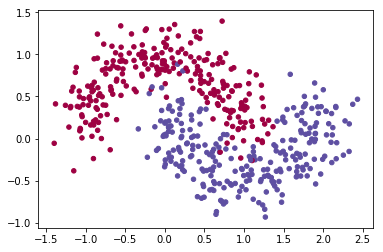

In [60]:
np.random.seed(2019)

# training set
X_train, Y_train = sklearn.datasets.make_moons(n_samples=512, noise=.2)
Y_train = Y_train.reshape(Y_train.shape[0], 1)
# test set
X_test, Y_test = sklearn.datasets.make_moons(n_samples=256, noise=.2)
Y_test = Y_test.reshape(Y_test.shape[0], 1)

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train.reshape(-1), s=20, cmap=plt.cm.Spectral);

Evaluate the following cell to optimise the model parameters using mini-batch gradient descent

Loss after 1 epoch: 0.65792
Loss after 1000 epochs: 0.44724
Loss after 2000 epochs: 0.39271
Loss after 3000 epochs: 0.41003
Loss after 4000 epochs: 0.37876
Loss after 5000 epochs: 0.26627
Loss after 6000 epochs: 0.35991
Loss after 7000 epochs: 0.35646
Loss after 8000 epochs: 0.42315
Loss after 9000 epochs: 0.22822
Loss after 10000 epochs: 0.23001
88.1% training acc.
87.1% test acc.


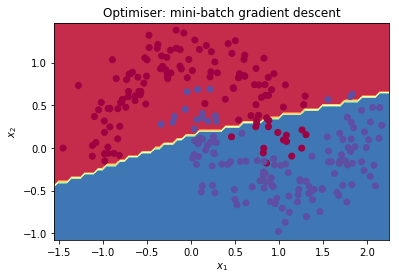

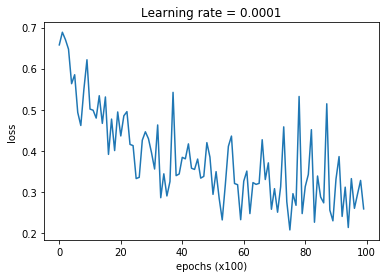

In [61]:
# train feed-forward model using mini-batch gradient descent
optimiser = {'name': 'gradient_descent', 'mini_batch_sz': 32}
lambd = 1e-4
params, grads, loss_log = model_fit(X_train, Y_train, n_h=[8, 3], optimiser=optimiser, epochs=10000, learning_rate=lambd)

# evaluate model
Y_hat_train = t6.model_predict(params, X_train)
Y_hat_test = t6.model_predict(params, X_test)
train_acc = 100 * (1 - np.mean(np.abs(Y_hat_train - Y_train)))
test_acc = 100 * (1 - np.mean(np.abs(Y_hat_test - Y_test)))
print("{:.1f}% training acc.".format(train_acc))
print("{:.1f}% test acc.".format(test_acc))

t6.plot_model(lambda x: t6.model_predict(params, x), X_test, Y_test.reshape(-1), "Optimiser: mini-batch gradient descent")

# plot loss
plt.plot(loss_log)
plt.ylabel('loss')
plt.xlabel('epochs (x100)')
plt.title("Learning rate = {}".format(lambd))
plt.show()

Evaluate the following cell to optimise the model parameters using momentum. Gains are negligeable with this shallow model but will be more noticable with larger models. Note the oscillations during training with some mini-batches leading to more stochastic noise.

Loss after 1 epoch: 0.65799
Loss after 1000 epochs: 0.44728
Loss after 2000 epochs: 0.39273
Loss after 3000 epochs: 0.41004
Loss after 4000 epochs: 0.37877
Loss after 5000 epochs: 0.26628
Loss after 6000 epochs: 0.35991
Loss after 7000 epochs: 0.35646
Loss after 8000 epochs: 0.42314
Loss after 9000 epochs: 0.22823
Loss after 10000 epochs: 0.23002
88.1% training acc.
87.1% test acc.


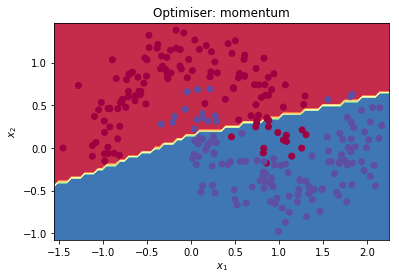

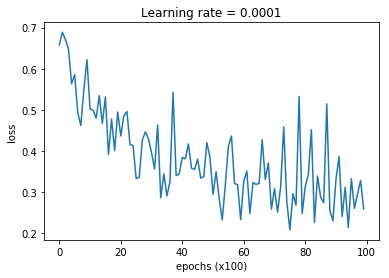

In [17]:
# train feed-forward model using momentum
optimiser = {'name': 'momentum', 'mini_batch_sz': 32, 'beta': 0.9}
lambd = 1e-4
params, grads, loss_log = model_fit(X_train, Y_train, n_h=[8, 3], optimiser=optimiser, epochs=10000, learning_rate=lambd)

# evaluate model
Y_hat_train = t6.model_predict(params, X_train)
Y_hat_test = t6.model_predict(params, X_test)
train_acc = 100 * (1 - np.mean(np.abs(Y_hat_train - Y_train)))
test_acc = 100 * (1 - np.mean(np.abs(Y_hat_test - Y_test)))
print("{:.1f}% training acc.".format(train_acc))
print("{:.1f}% test acc.".format(test_acc))

t6.plot_model(lambda x: t6.model_predict(params, x), X_test, Y_test.reshape(-1), "Optimiser: momentum")

# plot loss
plt.plot(loss_log)
plt.ylabel('loss')
plt.xlabel('epochs (x100)')
plt.title("Learning rate = {}".format(lambd))
plt.show()

Evaluate the following cell to optimise the model parameters using Adam. Note the faster convergence of the Adam algorithm. Both gradient descent and momentum will eventually reach similar performance if trained longer.

Loss after 1 epoch: 0.65634
Loss after 1000 epochs: 0.25558
Loss after 2000 epochs: 0.14308
Loss after 3000 epochs: 0.09028
Loss after 4000 epochs: 0.08080
Loss after 5000 epochs: 0.10649
Loss after 6000 epochs: 0.06193
Loss after 7000 epochs: 0.13396
Loss after 8000 epochs: 0.18099
Loss after 9000 epochs: 0.04849
Loss after 10000 epochs: 0.00528
96.7% training acc.
96.5% test acc.


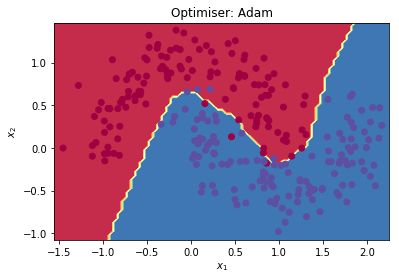

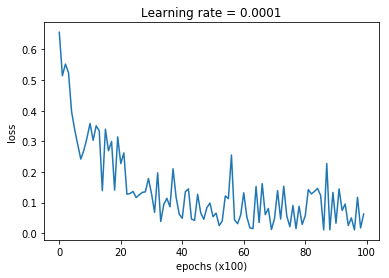

In [18]:
# train feed-forward model using adam
optimiser = {'name': 'adam', 'mini_batch_sz': 32, 'beta1': 0.9, 'beta2': 0.999, 'epsilon':1e-8}
lambd = 1e-4
params, grads, loss_log = model_fit(X_train, Y_train, n_h=[8, 3], optimiser=optimiser, epochs=10000, learning_rate=lambd)

# evaluate model
Y_hat_train = t6.model_predict(params, X_train)
Y_hat_test = t6.model_predict(params, X_test)
train_acc = 100 * (1 - np.mean(np.abs(Y_hat_train - Y_train)))
test_acc = 100 * (1 - np.mean(np.abs(Y_hat_test - Y_test)))
print("{:.1f}% training acc.".format(train_acc))
print("{:.1f}% test acc.".format(test_acc))

t6.plot_model(lambda x: t6.model_predict(params, x), X_test, Y_test.reshape(-1), "Optimiser: Adam")

# plot loss
plt.plot(loss_log)
plt.ylabel('loss')
plt.xlabel('epochs (x100)')
plt.title("Learning rate = {}".format(lambd))
plt.show()

The Adam optimiser (https://arxiv.org/pdf/1412.6980.pdf) is a popular algorithm for training neural networks. It generally achieves good optimisation with default hyper-parameter values $\beta_1$ and $\beta_2$ and a little tuning of the learning rate $\lambda$. Note the aditional memory requirements for training ; in addition to the gradient, two momentum scalars are cached for each trainable model parameter.



<table><tr>
<td> <img src="figs/opt1.gif" style="width: 350px;"/> </td>
<td width="20px;"></td>
<td> <img src="figs/opt2.gif" style="width: 350px;"/> </td>
</tr></table>
<caption><center>**Figure 3:** Optimisation behaviour for a loss function around saddle point (left). Illustration of oscillations and resulting overshooting (right). (Illustration A. Radford)
 </center></caption>
